In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [109]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Take a look at our data type

In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Look at first 5 rows

In [111]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
labels = train['Survived']

In [113]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [114]:
# These columns are useless for ML
train.drop(columns = ['Name', 'Ticket', 'Cabin', 'PassengerId'], inplace = True)

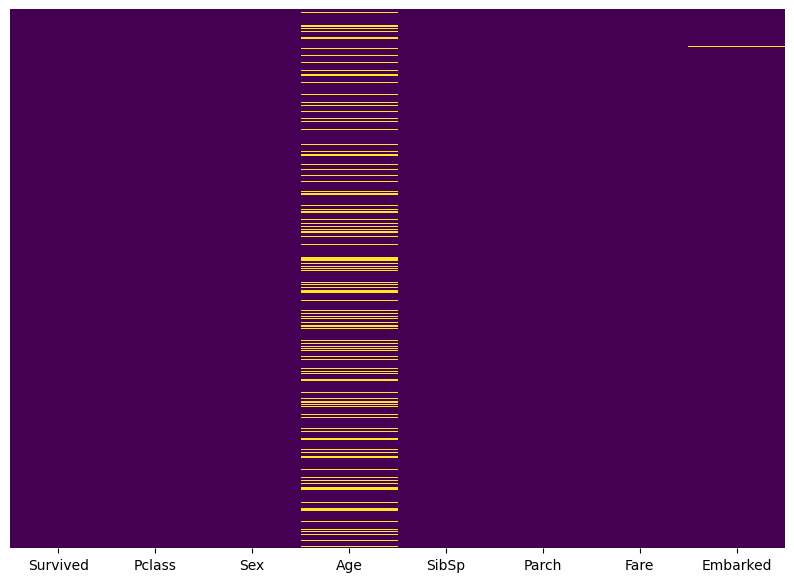

In [115]:
plt.figure(figsize = (10,7))
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()
# The missing value in Age are very dispersed

In [116]:
from sklearn.impute import SimpleImputer
#setting strategy to 'constant' 
mean_imputer = SimpleImputer(strategy = 'most_frequent')
train.iloc[:,:] = mean_imputer.fit_transform(train)
train.isnull().sum()
# Fill the missing Value

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

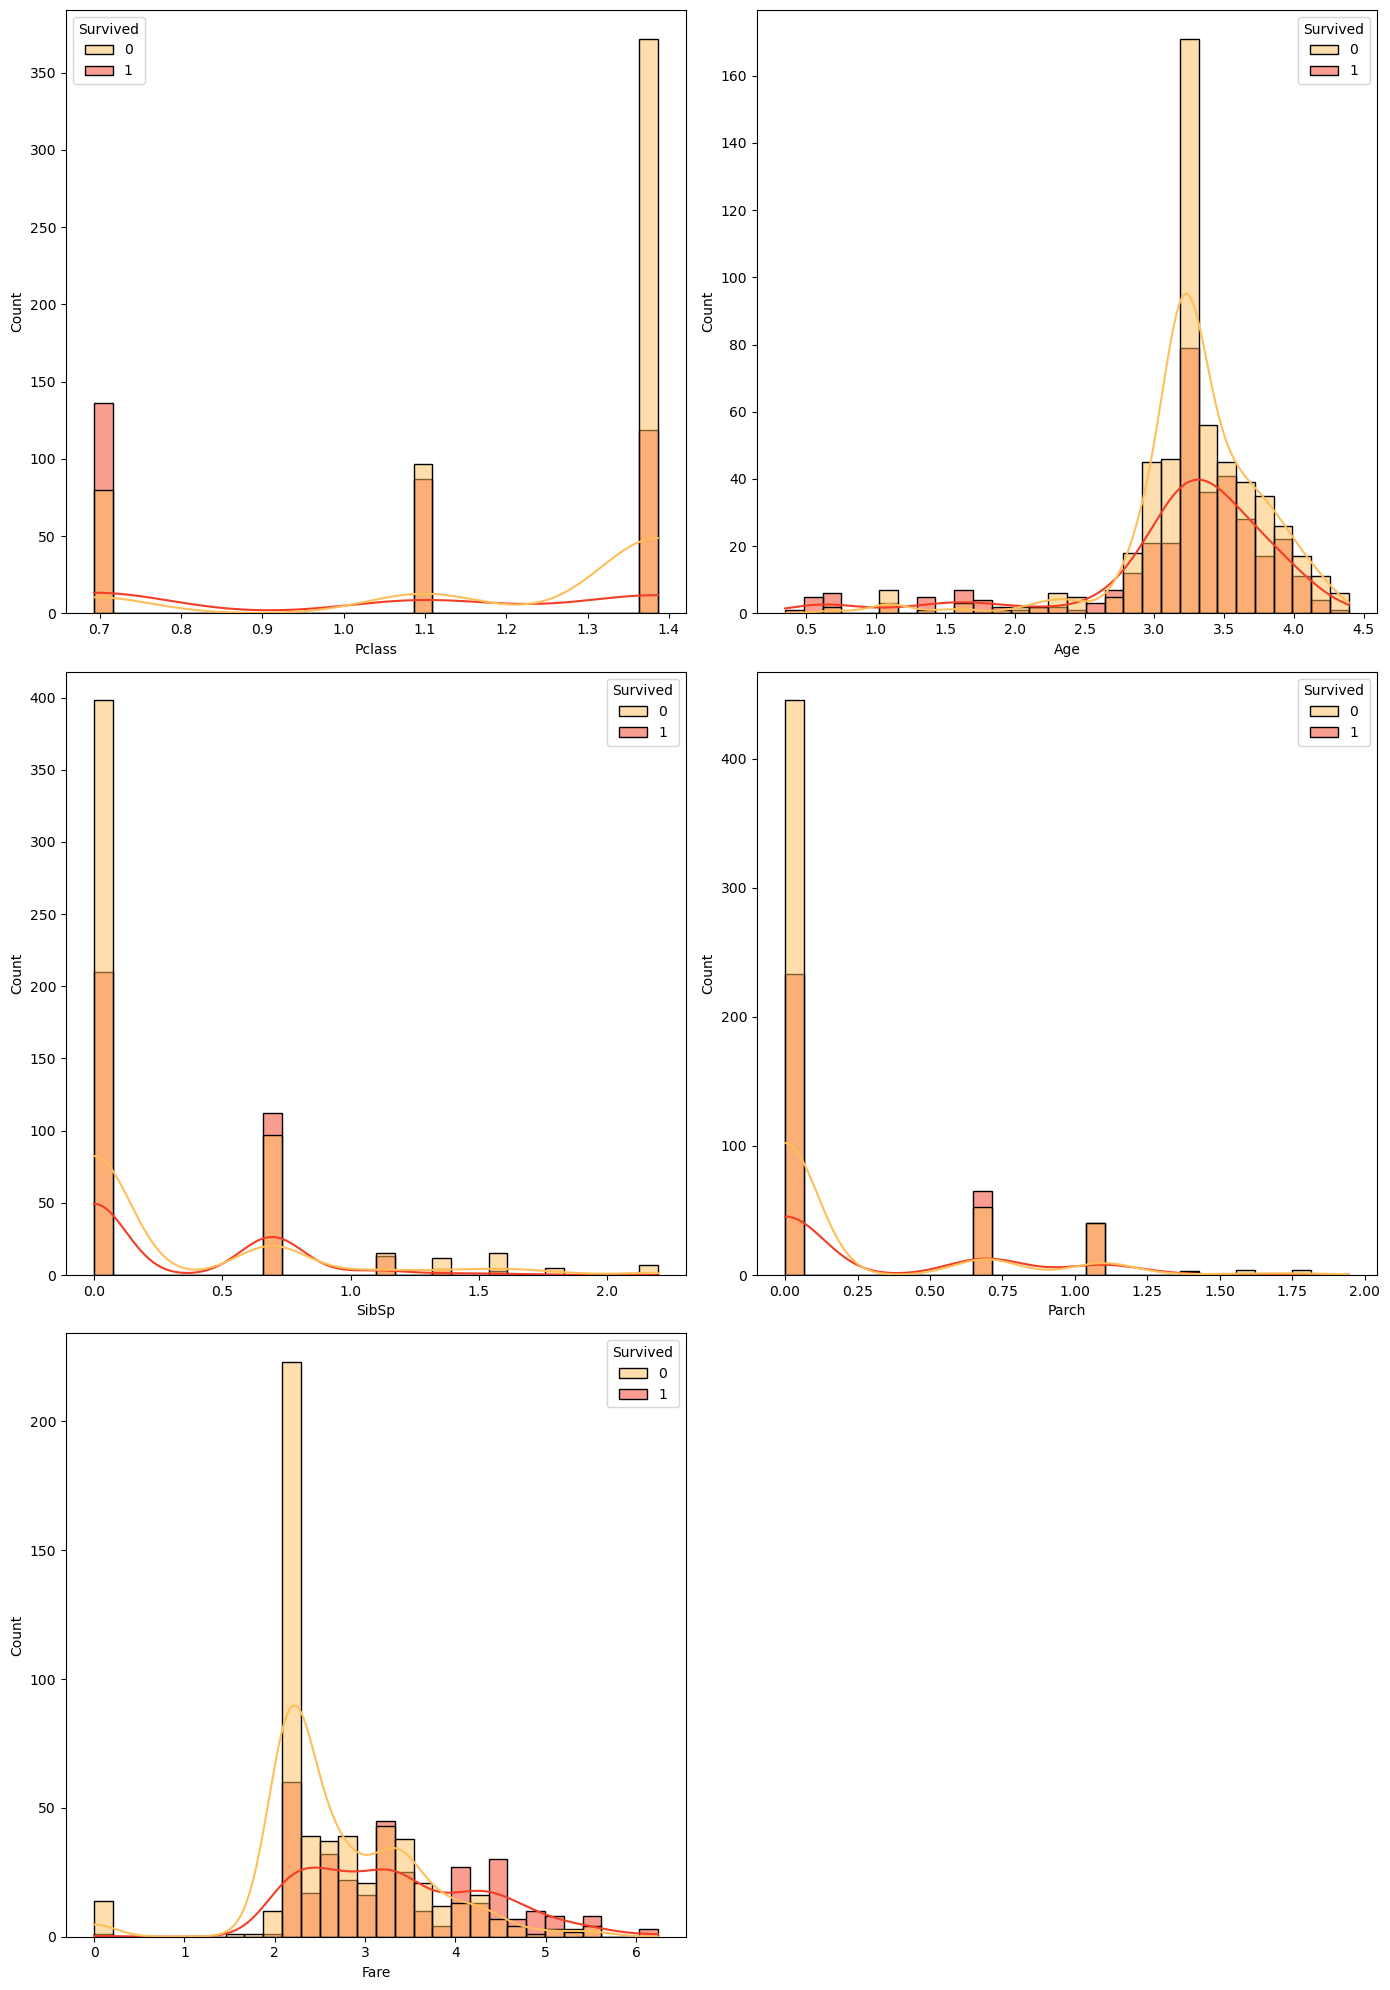

In [117]:
num_variable = train.select_dtypes(include = [np.number]).columns.tolist()
num_variable.remove('Survived')

for cols in num_variable:
    train[cols] = train[cols].apply(lambda x: np.log(x+1))
    
plt.figure(figsize = (14, len(num_variable)*4))
for idx, col in enumerate(num_variable):
    plt.subplot(len(num_variable)//2 + len(num_variable)%2, 2, idx + 1)
    sns.histplot(data = train, x = col, hue = 'Survived', bins = 30, kde = True, palette='YlOrRd')
    plt.tight_layout()
plt.show()

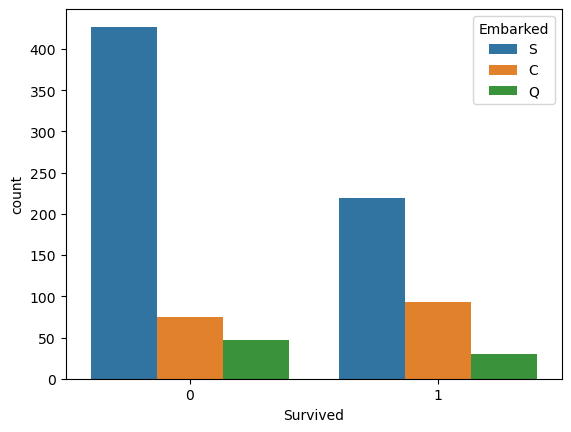

In [118]:
sns.countplot(train, x = 'Survived', hue = 'Embarked')
plt.show()

In [119]:
embarked_survival_percentage = train.groupby("Embarked")["Survived"].mean() * 100
embarked_survival_percentage
# Cherbourg have more than 50% Survived percentage, Queenstown only 38%, Southampton only 33%

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64

#### turn the category data to numerical

In [120]:
ordinal_categoricals = ['Embarked', 'Sex']

In [121]:
from sklearn.preprocessing import OrdinalEncoder

In [122]:
enc = OrdinalEncoder()

In [123]:
train[ordinal_categoricals]= enc.fit_transform(train[ordinal_categoricals])

In [125]:
train = train.drop(columns = ['Survived'])

In [126]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size = 0.3, random_state = 42, stratify = labels)

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
cl = RandomForestClassifier(random_state = 42)

In [129]:
cl.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [130]:
cl.score(X_test, y_test)

0.7835820895522388

##### Tuning hyperparameters

In [428]:
my_param_grid = {'n_estimators':[90, 100, 115], 'criterion':['entropy','gini'], 'max_depth': range(2,12,1),
                 'max_features':['log2', 'auto'], 'bootstrap': [True]}

In [429]:
from sklearn.model_selection import GridSearchCV

In [430]:
grid = GridSearchCV(estimator = RandomForestClassifier(random_state = 42),\
                    param_grid = my_param_grid, refit = True, verbose = 2, cv = 5 )


In [431]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=log2, n_estimators=90; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=log2, n_estimators=90; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=log2, n_estimators=90; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=log2, n_estimators=90; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=log2, n_estimators=90; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=2, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=ent

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True], 'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 12),
                         'max_features': ['log2', 'auto'],
                         'n_estimators': [90, 100, 115]},
             verbose=2)

In [432]:
grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'n_estimators': 90}

In [433]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       n_estimators=90, random_state=42)

In [446]:
y_hat_optimized = grid.predict(X_test)

In [447]:
grid.score(X_test, y_test)

0.7932960893854749

In [140]:
test.iloc[:,:] = mean_imputer.fit_transform(test)
Xtest = test.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket'])
Xtest[ordinal_categoricals]= enc.fit_transform(Xtest[ordinal_categoricals])

In [449]:
predictions = grid.predict(Xtest)

In [450]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output = output.astype({'Survived': 'int32'})
output.to_csv('Kevin_submission.csv', index=False)

### XGBoost

In [86]:
from xgboost import XGBClassifier

In [137]:
model = XGBClassifier(learning_rate = 0.1, n_estimators = 300, alpha = 10, max_depth = 4)

In [138]:
model.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [139]:
model.score(X_test, y_test)

0.8059701492537313

In [142]:
predictions = model.predict(Xtest)

In [143]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output = output.astype({'Survived': 'int32'})
output.to_csv('xgb_submission.csv', index = False)